## 관련 함수, 패키지 호출

In [ ]:
# 글꼴설치
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf

# 설치 후 런타임 재시작 필요

In [1]:
from google.colab import drive
drive.mount('/content/drive')

# 파이토치
import torch
import torch.nn.functional as F
import torchvision
import torch
import torch.nn as nn
import torch.optim as optim
import argparse
import torchvision
from torchvision import datasets, models, transforms

import pandas as pd
import numpy as np
import time
import os
from tqdm.notebook import tqdm
import re
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu") # device 객체

import matplotlib
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
# 한글 폰트 설정하기
fontpath = '/usr/share/fonts/truetype/nanum/NanumBarunGothic.ttf'
font = fm.FontProperties(fname=fontpath, size=10)
plt.rc('font', family='NanumBarunGothic')
matplotlib.font_manager._rebuild()

Mounted at /content/drive


In [2]:
transforms_test = transforms.Compose([
    transforms.Resize((224, 224)),
    transforms.ToTensor(),
    transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
])
# class_names = ['airc', 'airpods', 'bike', 'camera', 'car', 'coat', 'desktop', 'dressshose', 'electro', 'galaxy', 'glass', 'hat', 'iphone', 
#                'jewelry', 'jumper', 'keyboard', 'laptop', 'mouse', 'onepiece', 'pants', 'shirt', 'skirt', 'sneaker', 'top', 'tv', 'wallet', 'watch']
class_names = ['에어컨', '에어팟', '오토바이', '카메라', '자동차', '코트', '데스크탑', '구두', '전자제품', '갤럭시', '안경', '모자', '아이폰', 
               '쥬얼리', '점퍼', '키보드', '노트북', '마우스', '원피스', '바지', '셔츠', '치마', '스니커즈', '상의', 'tv', '지갑', '시계']

def imshow(input, title):
    input = input.numpy().transpose((1, 2, 0))
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    input = std * input + mean
    input = np.clip(input, 0, 1)
    plt.imshow(input)
    plt.title(title)
    plt.show()

## 입력한 제목 전처리 및 태그출력
def find_tag(title, cat_matrix):
    test = title[0].split(' ')
    for i, j in enumerate(test):
        i = re.sub('\W+',' ', j)
    test_input = []
    for i in test:
        if i in cat_matrix.columns:
            test_input.append(i)
    test_input.append('label')
    test_matrix = cat_matrix[test_input]

    # 상위 top5 태그 추출
    test_matrix['target'] = 0
    for i in range(len(test_input)-1):
        test_matrix['target'] += test_matrix[test_input[i]] 
    test_matrix['target'] = test_matrix['target'] / (len(test_input)-1)
    test_matrix = test_matrix[['label','target']].sort_values(by='target', ascending=False)[:5]
    # list로 출력
    # tag = test_matrix.label.to_list()
    # return(tag)
    return(test_matrix)

## 모델 호출

In [6]:
## 이미지 모델 호출
model = models.resnet50(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, 27)
model = model.to(device)
criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(model.parameters(), lr=0.0001, momentum=0.9)

checkpoint = torch.load('/content/drive/MyDrive/Colab Notebooks/1조/모델백업/ResNet50_Pre_T/rn50b96l31_49.pth')
model.load_state_dict(checkpoint['model_state_dict'])
optimizer.load_state_dict(checkpoint['optimizer_state_dict'])
check = checkpoint['epoch']
loss = checkpoint['loss']
model.eval()

## 태그추천 모델 호출
tag_list = ['노트북','에어팟','아이폰','키보드','마우스','갤럭시']

total_df = []
for i in range(len(tag_list)):
  total_df.append(pd.read_csv(f'/content/drive/MyDrive/Colab Notebooks/1조/3.Recommen_model/tag_model/{tag_list[i]}.csv'))
tag_dict={'노트북':total_df[0],'에어팟':total_df[1],'아이폰':total_df[2],'키보드':total_df[3],'마우스':total_df[4],'갤럭시':total_df[5]}

## 구현

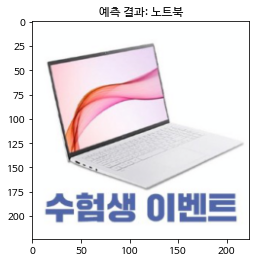

노트북


In [4]:
from PIL import Image
image = Image.open('/content/drive/MyDrive/Colab Notebooks/1조/check/train/labtop/c_10.jpg')
image = transforms_test(image).unsqueeze(0).to(device)

# 사진 출력 및 카테고리 출력
with torch.no_grad():
    outputs = model(image)
    _, preds = torch.max(outputs, 1)
    imshow(image.cpu().data[0], title='예측 결과: ' + class_names[preds[0]])
    print(class_names[preds[0]])

In [33]:
# 제목 입력
title = [input('제목을 입력해주세요 : ')]

select_matrix = tag_dict[class_names[preds[0]]]
find_tag(title, select_matrix)

제목을 입력해주세요 : lg그램 17인치 팝니다


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:19: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas

['lg그램노트북', '엘지그램노트북', '15인치그램', '그램노트북', '17인치']